Submitted by: SAMEER DAHAL

7.1 WARMING UP EXERCISE:

DATASET

In [ ]:
# Daily time (in hours): [study, entertainment, sleep]
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]


TASK 1

In [ ]:
low_study = []        # < 3 hours
moderate_study = []   # 3 to 5 hours (inclusive)
high_study = []       # > 5 hours

for day in time_data:
    study_hours = day[0]

    if study_hours < 3:
        low_study.append(study_hours)
    elif 3 <= study_hours <= 5:
        moderate_study.append(study_hours)
    else:
        high_study.append(study_hours)

print("Low study days:", low_study)
print("Moderate study days:", moderate_study)
print("High study days:", high_study)


Low study days: [2.5, 1.5, 2.0, 2.5]
Moderate study days: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study days: [5.5, 6.0]


TASK 2

In [ ]:
print("Number of low study days:", len(low_study))
print("Number of moderate study days:", len(moderate_study))
print("Number of high study days:", len(high_study))


Number of low study days: 4
Number of moderate study days: 9
Number of high study days: 2


TASK 3

In [ ]:
study_minutes = []

for day in time_data:
    study_hours = day[0]
    study_minutes.append(study_hours * 60)

print("Study time in minutes:", study_minutes)


Study time in minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


TASK4

In [ ]:
study_hours_list = []
entertainment_hours_list = []
sleep_hours_list = []

for study, entertainment, sleep in time_data:
    study_hours_list.append(study)
    entertainment_hours_list.append(entertainment)
    sleep_hours_list.append(sleep)

avg_study = sum(study_hours_list) / len(study_hours_list)
avg_entertainment = sum(entertainment_hours_list) / len(entertainment_hours_list)
avg_sleep = sum(sleep_hours_list) / len(sleep_hours_list)

print("Average study hours:", avg_study)
print("Average entertainment hours:", avg_entertainment)
print("Average sleep hours:", avg_sleep)


Average study hours: 3.7
Average entertainment hours: 2.5
Average sleep hours: 7.166666666666667


TASK 5

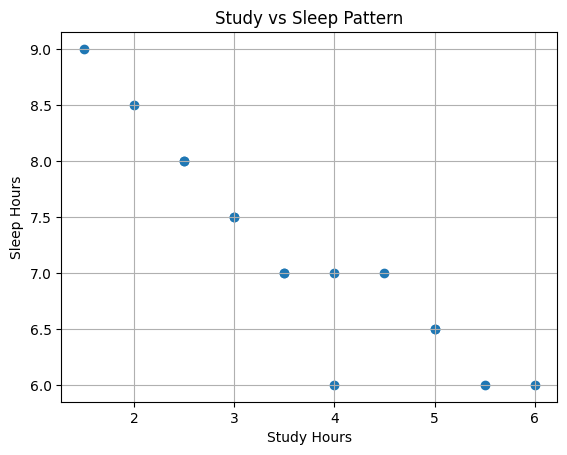

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(study_hours_list, sleep_hours_list)

plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.grid(True)

plt.show()


8.1 RECURSION:

TASK 1

In [ ]:
def sum_nested_list(nested_list):
    """
    Recursively sums all numbers inside a nested list.
    """
    total = 0
    for element in nested_list:
        if isinstance(element, list):
            total += sum_nested_list(element)
        else:
            total += element
    return total


# Test
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Sum:", sum_nested_list(nested_list))


Sum: 36


TASK 2

In [ ]:
def generate_permutations(s):
    """
    Recursively generates all unique permutations of string s.
    """
    # Base case: single char or empty string
    if len(s) <= 1:
        return [s]

    permutations = []
    used = set()  # to avoid duplicates

    for i in range(len(s)):
        char = s[i]
        if char in used:
            continue
        used.add(char)

        remaining = s[:i] + s[i+1:]

        for perm in generate_permutations(remaining):
            permutations.append(char + perm)

    return permutations


# Tests
print(generate_permutations("abc"))
print(generate_permutations("aab"))


['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


TASK 3

In [ ]:
def calculate_directory_size(directory):
    """
    Recursively calculates total size of a directory represented as nested dictionaries.
    """
    total_size = 0

    for key, value in directory.items():
        if isinstance(value, dict):
            total_size += calculate_directory_size(value)
        else:
            total_size += value

    return total_size


# Test
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print("Total directory size (KB):", calculate_directory_size(directory_structure))


Total directory size (KB): 1400


8.2 DYNAMIC PROGRAMMING:

TASK 1

In [ ]:
def min_coins(coins, amount):
    """
    Uses DP (tabulation) to find minimum number of coins to make 'amount'.
    Returns -1 if impossible.
    """
    dp = [float("inf")] * (amount + 1)
    dp[0] = 0  # 0 coins needed to make amount 0

    for coin in coins:
        for a in range(coin, amount + 1):
            dp[a] = min(dp[a], dp[a - coin] + 1)

    return dp[amount] if dp[amount] != float("inf") else -1


# Test
print(min_coins([1, 2, 5], 11))  # expected 3


3


TASK 2

In [ ]:
def longest_common_subsequence(s1, s2):
    """
    Returns length of longest common subsequence between s1 and s2.
    """
    n, m = len(s1), len(s2)

    dp = [[0]*(m+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for j in range(1, m+1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[n][m]


# Test
print(longest_common_subsequence("abcde", "ace"))  # expected 3


3


TASK 3

In [ ]:
def knapsack(weights, values, capacity):
    """
    Returns maximum value that can fit into knapsack of given capacity.
    Uses DP (tabulation).
    """
    n = len(weights)
    dp = [[0]*(capacity+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for cap in range(capacity+1):
            if weights[i-1] <= cap:
                dp[i][cap] = max(
                    dp[i-1][cap],                          # skip item
                    dp[i-1][cap - weights[i-1]] + values[i-1]  # take item
                )
            else:
                dp[i][cap] = dp[i-1][cap]

    return dp[n][capacity]


# Test
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))  # expected 9


9
